# 가치 반복법

- 가치를 중시
  - 정책 반복법은 1 에피소드 단위로 일종의 보상을 갱신함으로써, 보상으로 파라미터를 최적화함
  - 가치 반복법은 행동 1회 단위로 파라미터를 갱신함
    - 어떤 행동 선택시, 다음 상태 가치와 현재 상태 가치의 차이를 계산
    - 그 차이만큼 현재 상태 가치를 증가시킴
- 알고리즘
  - Sarsa(살사)
    - 수렴은 느리지만, 국소적인 해답에 갇히지 않는다(유연한 답을 가짐)
  - Q Learning(Q 학습)
    - 수렴은 빠르다. 국소적인 해답에 갇히기 쉽다

# 요소 설계

|강화 학습 요소|미로 게임|
|:--:|:--|
|환경|미로|
|에이전트|미로속 마우스|
|목적|골인 지점에 도착=>미로 탈출|
|에피소드|골인 지점까지 도착|
|상태|에이전트의 위치|
|행동|상하좌우 이동|
|보상|골인하면 +1|
|학습방법|Sarsa, Q학슴|
|파라미터 갱신 간력|1 행동 마다|

# 학습 사이클

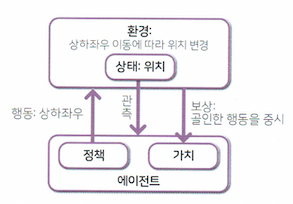

In [0]:
from IPython.display import Image
# 정책 반복법
Image('/content/drive/My Drive/Colab Notebooks/강화/강화10.png', width=300)
# 골인 지점에 도착했다는 것이 중요(행동이 중요)

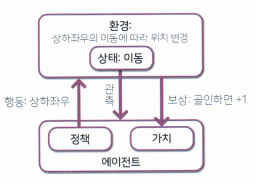

In [0]:
# 가치 반복법
Image('/content/drive/My Drive/Colab Notebooks/강화/강화11.png', width=300)
# 골인 지점에 도착하면 보상을 1 받는다(보상을 받는, 즉 수익이 발생되는, 가치가 중요)

# 수익, 할인 보상 합계

- 강화학습의 목표
  - 수익(즉시 보상 + 지연 보상(미래에 발생))의 극대화를 목표

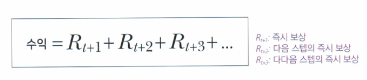

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화12.png', width=600)

- 수익 계산식
  - 에이전트의 사고방식에 따라 달라짐
  - 예, 할인 보상 합계 (먼 미래의 보상을 할인한 보상 합계)

In [0]:
import numpy as np
2**2, 0.1**0.1

(4, 0.7943282347242815)

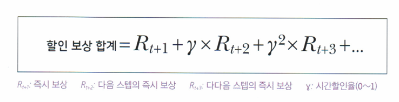

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화13.png', width=600)
# 즉시보상 + 시간할인율(0~1)*다음 스탬의 즉시보상 + 시간할인율(0~1)^2*다음 스탬의 즉시보상 + ..
# 먼 미래일수록 할인율은 커진다

# 가치

- 수익은 아직 발생하지 않은 미래에 발생 가능성이 있는 일을 포함한 확정되지 않은 값이다
  - 에이전트의 상태와 정책을 고정한후 조건부로 수익 계산
    - 이것을 가치라고 정의한다
      - 만약, 가치가 크게 되는 조건을 찾아내념ㄴ 학습이 되었다고 간주 

- 방법
  - 행동 가치 함수 ( action value function )
  - 상태 가치 함수 ( state value function )

## 행동 가치 함수 ( action value function )

- 특정한 상태에서 특정한 행동을 선택하는 가치를 계산하는 함수
- 행동 가치 함수는 기호 Q로 표기
- Q 함수라고 부름

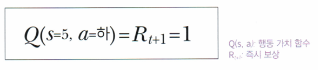

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화14.png', width=600)
# 에이전트가 5에 위치해 있다
# 만약 하 방향을 선택하는 행동을 햇다면, 골인 지점에 도착하고 보상 1을 받는다

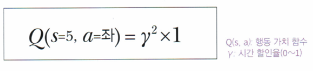

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화15.png', width=600)
# 에이전트가 5에 위치해 있다
# 만약 좌 방향을 선택하는 행동을 햇다면, 4로 이동하게 되어서 골인 지점(8)에 멀어진다
# 여기서 골인 지점으로 갈려면 , 5->4->5->8 이렇게 2번의 스텝이 필요하게 되고
# 이를 위한 시간이 필요하다. 시간 할인율에 의해, 보상이 할인(줄어든다)
# 할인율(제곱, 2번 스텝이므로) * (골인시 보상 1)

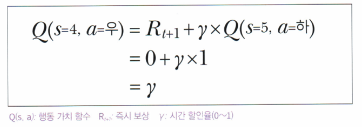

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화16.png', width=600)
# 만약 4에 위치해 잇다면, 골인까지 4->5->8
# (4->5까지 가는 보상:골인아니므로 0) + 시간지연할인율*(5->8까지 가는 보상:골인이므로 1)
# 결국 시간 지연 할인율이 가치가 된다

## 상태 가치 함수 ( state value function )

- 특정 상태의 가치 계산
- 상태 가치 함수는 V로 표기

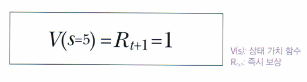

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화17.png', width=600)
# 에이전트가 5 위치에 있다
# 아래 이동이라는 행동을 선택하면, 골인 지점에 도착하고 보상 1을 받는다
# 행동 가치 함수대비 다른점은 행동이전에 그 상태(미로게임에서는 위치)의 가치를 평가

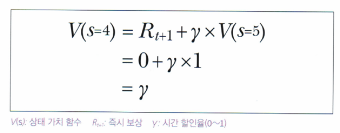

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화18.png', width=600)
# 에이전트가 4 위치에 있다
# 4->5->8 행동을 선택하면, 골인 지점에 도착하고 보상 1을 받는다

## 벨만 방정식 (Bellman equation)

- 행동 가치 함수, 상태 가치 함수의 수식을 일반적 형태로 변경
- 현재 상태와 다음 상태의 관계를 나타내는 방정식
  - 위의 식은 결군 현재와 다음을 묘사한것이다

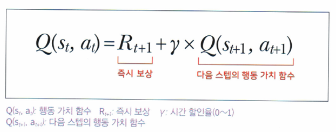

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화19.png', width=600)
# 행동 가치 함수 => Q 함수
# 현재 행동 가치 함수 = 즉시 보상(t+1) + γ(시간 할인율:0~1) * (다음스텝(t+1) 행동 가치 함수)

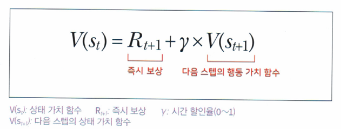

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화20.png', width=600)
# 상태 가치 함수 => V 함수
# 현재 상태 가치 함수 = 즉시 보상(t+1) + γ(시간 할인율:0~1) * (다음스텝(t+1) 상태 가치 함수)

## 마르코프 결정 과정 (Markov Decision Process:MDP)

- 벨만 방정식이 성림하기 위해, 환경이 MDP를 따라야 한다
- 다음 상태가 현재 상태에서 선택한 행동에 따라 확정되는 시스템을 의미
  - 만약, 과거 상태에 의해 다음 상태가 결정되는 환경은 마르코프 결정 과증을 따르는 환경이 아니다

- 벨만 방정식으로 부터 행동 가치 함수를 학습하는 방법
  - Sarsa, Q 학습 
- 벨만 방정식으로 부터 상태 가치 함수를 학습하는 방법
  - Dueling Network, A2C (생략)

In [0]:
# 패키지 임포트
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

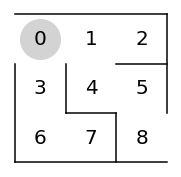

In [0]:
# 미로 생성
fig = plt.figure(figsize=(3, 3))

# 벽
plt.plot([0, 3], [3, 3], color='k')
plt.plot([0, 3], [0, 0], color='k')
plt.plot([0, 0], [0, 2], color='k')
plt.plot([3, 3], [1, 3], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([2, 3], [2, 2], color='k')
plt.plot([2, 1], [1, 1], color='k')
plt.plot([2, 2], [0, 1], color='k')

# 숫자
for i in range(3):
    for j in range(3):
        plt.text(0.5+i, 2.5-j, str(i+j*3), size=20, ha='center', va='center')

# 원
circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

# 눈금과 테두리 숨기기
plt.tick_params(axis='both', which='both', bottom=False, top= False,
        labelbottom=False, right=False, left=False, labelleft=False)
plt.box(False)

In [0]:
# 파라미터 θ의 초기값 준비
theta_0 = np.array([
    [np.nan, 1, 1, np.nan], # 0
    [np.nan, 1, 1, 1], # 1
    [np.nan, np.nan, np.nan, 1], # 2
    [1, np.nan, 1, np.nan], # 3
    [1, 1, np.nan, np.nan], # 4
    [np.nan, np.nan, 1, 1], # 5
    [1, 1, np.nan, np.nan], # 6
    [np.nan, np.nan, np.nan, 1]]) # 7

# 파라미터 θ를 정책으로 변환
def get_pi(theta):
    # 비율 계산
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    pi = np.nan_to_num(pi)    
    return pi

# 파라미터 θ의 초기값을 정책으로 변환
pi_0 = get_pi(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [0]:
# 행동 가치 함수 준비
# 최초는 정확한 행동 가치 함수를 준비할수 없으므로, 랜덤하게, 적당한 가중치를 줘서 구성
[a, b]  = theta_0.shape
Q       = np.random.rand(a, b) * theta_0 * 0.01
print(Q)

[[       nan 0.00888915 0.0077901         nan]
 [       nan 0.0076404  0.00760354 0.00416105]
 [       nan        nan        nan 0.0037071 ]
 [0.00126476        nan 0.00028784        nan]
 [0.00031676 0.0053605         nan        nan]
 [       nan        nan 0.00835556 0.00810848]
 [0.00441989 0.00467851        nan        nan]
 [       nan        nan        nan 0.00963858]]


In [0]:
# 행동에 따라 다음 상태 얻기
def get_s_next(s, a):
    if a == 0: # 상
        return s - 3
    elif a == 1: # 우
        return s + 1
    elif a == 2: # 하
        return s + 3
    elif a == 3: # 좌
        return s - 1

In [0]:
# 행동 선택을 엡실론 그레디 알고리즘을 적용하서 처리
# 랜덤 또는 행동 가치 함수에 따라 행동 얻기
# s : 상태
# pi_0 : 기본 파라미터
# epsilon : 비율 0.1이 베스트이다, 시뮬레이션시 값을 줄여가면서 확인
# Q    : 행동 가치 파라미터
def get_a(s, Q, epsilon, pi_0):
    if np.random.rand() < epsilon:
        # 랜덤으로 행동을 선택
        return np.random.choice([0, 1, 2, 3], p=pi_0[s])
    else:
        # 행동 가치 함수로 행동을 선택, nan 제외하고 최대값을 얻는다
        return np.nanargmax(Q[s])

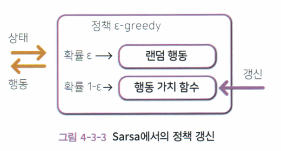

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화21.png', width=200)

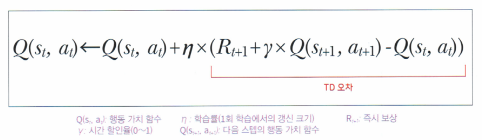

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화22.png', width=500)
# 행동 가치 함수 갱신 = 행동 가치 함수 + 학습률*TD 오차

# TD오차 = 다음번에 받을 즉시보상 + 학습계수*다음스텝의행동가치-현재행동가치
# Temporal Difference 오차 : 행동전 평가값과 해동후 평가값의 차이
# 최적화를 통해 td 오차를 0에 가깝게 줄임으로써, 평가값이 일치하게 되면 행동에 대한
# 보상을 정확하게 예측할 수 있다
# 이런 정확한 예측을 기반으로 가장 큰 보상을 받을 수 이는 행동을 선택함으로써 가장 
# 큰 수입이 기대되는 일련의 행동을 수행할수 있다
# 학습 계수는 1회 학습으로 갱신하는 크기
# 시간 할인율은 미래 보상의 할인율이다

In [0]:
# 행동을 한번식 수행할때 마가 행동 가치 함수를 갱신한다
# Sarsa에 따른 행동 가치 함수 갱신
# Saras는 엡셀론 그리디 알고리즘을 사용하므로 무작위성을 포함한다
def sarsa(s, a, r, s_next, a_next, Q):
    eta   = 0.1 # 학습 계수
    gamma = 0.9 # 시간 할인율    
    if s_next == 8: # 골인지점
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        # 해당 행동 가치 함수에서 위치와 액션에 따른 값을 이용해 처리
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    return Q

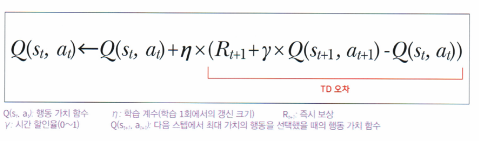

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/강화/강화23.png', width=500)
# 그림이 잘못됨

In [0]:
# 학습 갱신 함수 갱신시 무작위성을 포함하지 않는다
# Q 학습이 더 빠르지만, 국소적인 정답에 갖칠수 있다
# Q 학습에 따른 행동 가치 함수 갱신
def q_learning(s, a, r, s_next, a_next, Q):
    eta     = 0.1 # 학습 계수
    gamma   = 0.9 # 시간 할인율    
    if s_next == 8: # 골인 지점
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        # 해당 정책에서 최대값을 구해서 처리
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
    return Q

In [0]:
# 1 에피소드 실행
def play(Q, epsilon, pi):
    s = 0 # 상태
    a = a_next = get_a(s, Q, epsilon, pi) # 행동 초기값
    s_a_history = [[0, np.nan]] # 상태와 행동 이력

    # 에피소드 완료 시까지 반복
    while True:
        # 행동에 따른 다음 상태 얻기=
        a = a_next
        s_next = get_s_next(s, a)

        # 이력 갱신
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])

        # 종료 판정
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            # 행동 가치 함수 Q에 따라 행동 얻기
            a_next = get_a(s_next, Q, epsilon, pi)

        # 행동 가치 함수 갱신 (* Q 학습 시에는 q_learning으로 변경)
        Q = sarsa(s, a, r, s_next, a_next, Q)
        # Q = q_learning(s, a, r, s_next, a_next, Q)
        
        # 종료 판정
        if s_next == 8:
            break
        else:
            s = s_next

    # 이력과 행동 가치 함수 반환
    return [s_a_history, Q]

In [0]:
epsilon = 0.5  # ε-greedy에서의 ε의 초기값

# 에피소드를 반복해서 실행하며 학습
for episode in range(10):
    # ε-greedy값을 점점 감소시킴
    epsilon = epsilon / 2

    # 1 에피소드 실행해 이력과 행동 가치 함수 얻기
    [s_a_history, Q] = play(Q, epsilon, pi_0)
    
    # 출력
    print('에피소드: {}, 스텝: {}'.format(
        episode, len(s_a_history)-1))

에피소드: 0, 스텝: 6
에피소드: 1, 스텝: 4
에피소드: 2, 스텝: 6
에피소드: 3, 스텝: 4
에피소드: 4, 스텝: 4
에피소드: 5, 스텝: 4
에피소드: 6, 스텝: 4
에피소드: 7, 스텝: 4
에피소드: 8, 스텝: 4
에피소드: 9, 스텝: 4


In [0]:
# 애니메이션 정기 처리 수행 함수
def animate(i):
    state = s_a_history[i][0]
    circle.set_data((state % 3) + 0.5, 2.5 - int(state / 3))
    return circle

# 애니메이션 표시
anim = animation.FuncAnimation(fig, animate, \
        frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())